In [2]:
# 데이터 불러오기❤️

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/sample_data/vgames2.csv',encoding='UTF8', index_col=0)
df.dtypes


Mounted at /content/drive


Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [3]:
#결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
#결측치 삭제
df.dropna(axis=0,inplace= True)
df.dropna(axis=1,inplace= False)
#결측치 0으로 채워주기
df.fillna(0)
#결측치 확인
df.isnull().sum()
#제대로 모두 제거 된걸 확인 할 수 있다!

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [5]:
df # 데이터 프레임 분석을 해보자 


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 각 열들은 무슨 의미를 가지고 있을까?
Name : 게임의 이름입니다.\
Platform : 게임이 지원되는 플랫폼의 이름입니다.\
Year : 게임이 출시된 연도입니다.\
Genre : 게임의 장르입니다.\
Publisher : 게임을 제작한 회사입니다.\
NA_Sales : 북미지역에서의 출고량입니다.\
EU_Sales : 유럽지역에서의 출고량입니다.\
JP_Sales : 일본지역에서의 출고량입니다.\
Other_Sales : 기타지역에서의 출고량입니다.\
## 나는 이 열들을 통해 무엇을 분석 해야 할까?


### 1. `지역에 따라서 선호하는 게임 장르가 다를까` 
### 2. `연도별 게임의 트렌드가 있을까` 
### 3. `출고량이 높은 게임에 대한 분석 및 시각화 프로세스`

## 튀어나온 데이터 처리는 어떻게 할까?
1. 년도에 9,68 이런식으로 쓰인 데이터 있음.
-> 데이터에 유의미한 정도로 수가 많은건 아니고 모두 100보다 작은 값\
-> 얘네도 조건문 활용 해서 0 으로 만들어 아예 데이터 값에 영향이 없도록 하자
2. ***플랫폼*** 10756 11811 11839 12193 행에 2600 숫자쓰임
-> 이거는 2600으로 값이 통일 되어있으니까 아예 null 이나 0으로 바꾸자
3. Year, Genre, Publisher 결측치 0으로 채우고 어쩔거임
-> 데이터 분석에 유의미한 의미 없는것으로 간주하거나 장르 찾아서 넣거나
4. sales에 M, K 이렇게 되어있는거는 어쩔거..?

 0.01M 60K 이렇게 되어있으면 내가 단위 변환을 해주자!
60k-> 6/100= 0.06 60k = 0.06M 뒤에 M 떄버려
 0.01M 뒤에 M 때버려


# **다음 분기에 어떤 게임을 설계해야 할까!! 가 목표!**



In [6]:
from pandas.core.series import Series
# 데이터 처리 시작
# 년도에 9,68 이런식으로 쓰인 데이터 있음.
# 조건문 활용 해서 0 으로 만들어 아예 데이터 값에 영향이 없도록 하자
# 특정 열 값 처리
# 특정 열의 조건에 맞는 row만 추출

# 100보다 작은 값 확인
df[df['Year'] < 100]
# 변환

df.loc[(df['Year'] < 100),'Year']=0
# 확인
df[df['Year'] < 100]



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
75,Age of Empires III: Complete Collection,PC,0.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
82,Treasures of the Deep,PS,0.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
214,NASCAR Unleashed,PS3,0.0,Racing,Activision,0.09,0,0,0.01
305,Kung Fu Panda: Showdown of Legendary Legends,PS3,0.0,Action,Little Orbit,0,0.02,0,0
769,NASCAR Thunder 2004,PS2,0.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15986,Sugoi Hebereke,SNES,0.0,Fighting,Sunsoft,0,0,0.02,0
16104,Fab 5 Soccer,DS,0.0,Sports,Destineer,0.01,0,0,0
16150,Dragon Ball Z: Burst Limit,X360,0.0,Fighting,Atari,0.24,0.18,0.03,0.05
16395,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [7]:
# 플랫폼 10756 11811 11839 12193 행에 2600 숫자쓰임
# 2600으로 값이 통일 되어있으니까 아예 null 이나 0으로 바꾸자

df[df['Platform'] == '2600']
# 변환

df.loc[(df['Platform'] =='2600'),'Platform']=0
# 확인
df[df['Platform'] == 0]




,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
38,Beamrider,0,1984.0,Racing,Activision,0.26,0.01,0,0
211,Mountain King,0,1982.0,Action,CBS Electronics,0.29,0.02,0,0
665,Smurf: Rescue In Gargamel's Castle,0,1981.0,Action,Coleco,0.55,0.03,0,0.01
821,Fantastic Voyage,0,1981.0,Action,20th Century Fox Video Games,0.32,0.02,0,0
878,Deadly Duck,0,1981.0,Shooter,20th Century Fox Video Games,0.21,0.01,0,0
...,...,...,...,...,...,...,...,...,...
16211,Crazy Climber,0,1981.0,Action,Atari,0.21,0.01,0,0
16264,Frogs And Flies,0,1981.0,Action,Mattel Interactive,0.33,0.02,0,0
16318,Polaris,0,1982.0,Action,Tigervision,0.26,0.02,0,0
16364,Pitfall II: Lost Caverns,0,1983.0,Platform,Activision,1.22,0.07,0,0.02


In [8]:
# M, K 숫자로 변환하고 자료형 float로 변환 하는 함수
def ch_sles(a):
  global b
  if 'M' in a:
    b= a.replace('M','')
    b= float(b)
    
  elif 'K' in a:
    b= a.replace('K','')
    b=float(b)
    b= b * 10 ** -3
  else:
    b=a
    b=float(b)
  return b

ch_sles('60K')



0.06

In [9]:
#함수 적용
df['NA_Sales']=df['NA_Sales'].apply(ch_sles)
df['EU_Sales']=df['EU_Sales'].apply(ch_sles)
df['JP_Sales']=df['JP_Sales'].apply(ch_sles)
df['Other_Sales']=df['Other_Sales'].apply(ch_sles)
# 확인
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# ❤️👏데이터 가공 완료👏❤️

In [10]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


나는 이 열들을 통해 무엇을 분석 해야 할까?
1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

- Sprint 2 : Hypothesis Test, CI, Bayesian\
t-test\
카이 분포 \


- Sprint 3 : DR, PCA, Cluster


지역에 따라서 선호하는 게임 장르가 다를까<- 가설을 무엇으로 세우고 검증을 진행 해야 하는가?
t-test 진행 할때, 지역에 따라서 선호하는 게임 장르가 같다 로 가설을 세우고 
이를 검증 해본다

(1) 그룹바이 함수 이용해보자\
(2) 함수를 만들자 세개 값 비교 하고\
(3) 제일 큰 값 가진 나라로 칼럼 만들어서 거기에 저장\
(4) 제일 큰값 가진 나라 칼럼 + 장르 칼럼 둘이 조합해서 데이터를 비교해보자\
(5) 이때 그룹바이 함수 써볼까\
(6) 그룹바이 함수로 장르 칼럼에 장르가 뭐뭐 있는지 확인\
(7) 그룹바이 써서 나라별로 뽑아서 그룹 만들어\ 
(8) 그 다음에 그 그룹에서 어느 장르가 제일 많은가를 찾아보자\
 -> 그룹이 나라 별로 나오겠지, 이떄 t-test나 chi-sq를 쓸수 있을까? 이걸 아침에 고민하자!!

이렇게 데이터를 가공해서 가설 검증을 할 수 있을까?\
-> 귀무가설을 지역에 따라 선호하는 게임 장르가 같다로 설정\
그 다음 데이터를 넣을때..? 데이터 어떻게 넣을건데\
t-test 할때 데이터 셋 설정 확인\

카이제곱 쓰자!!!!!!!


In [11]:
# groupby 
# 장르 확인
df.groupby('Genre').size()


Genre
Action          3240
Adventure       1268
Fighting         835
Misc            1681
Platform         873
Puzzle           566
Racing          1219
Role-Playing    1465
Shooter         1280
Simulation       846
Sports          2299
Strategy         669
dtype: int64

In [12]:
# 세개 값 비교 하는 함수
# "NA"=1, "EU"=2 "JP"=3 "OT"=4
def com_thr(x,y,z,e):
  max=0
  for i in range(0,4):
    if x>y:
      max=x
      if max>z:
        max=x
        if max>e:
          max="NA"
        else:
          max="OT"      
      else:
        max=z
        if max>e:
          max="JP"
        else:
          max="OT"
    else:
      max=y
      if max>z:
        max=y
        if max>e:
          max="EU"
        else:
          max="OT"
      else:
        max=z
        if max>e:
          max="JP"
        else:
          max="OT"
  return max
com_thr(0.3,0.1,0.04,0)

'NA'

In [13]:
df_coun=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_coun

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,0.04,0.00,0.00,0.00
2,0.17,0.00,0.00,0.01
3,0.00,0.00,0.02,0.00
4,0.04,0.00,0.00,0.00
5,0.12,0.09,0.00,0.04
...,...,...,...,...
16594,0.15,0.04,0.00,0.01
16595,0.01,0.00,0.00,0.00
16596,0.44,0.19,0.03,0.13
16597,0.05,0.05,0.25,0.03


In [14]:
#데이터 프레임 칼럼 추가
df["max_coun"]=0

In [15]:
#for 문 사용해서 비교
sum=0
for i in range(len(df_coun['NA_Sales'])):
  df.iloc[i,9]=com_thr(df_coun.iloc[i,0],df_coun.iloc[i,1],df_coun.iloc[i,2],df_coun.iloc[i,3])
  
print(df['max_coun'])

#print(sum)
#iloc[행,열]
#df_coun.iloc[0,0]
#df_coun.iloc[0,1]

1        NA
2        NA
3        JP
4        NA
5        NA
         ..
16594    NA
16595    NA
16596    NA
16597    JP
16598    JP
Name: max_coun, Length: 16241, dtype: object


In [16]:
#카이제곱 사용! 나라와 장르의 분포가 독립적인가, 독립적이지 않은가를 판단해야 함
# 데이터 정리
result= pd.crosstab(df['max_coun'],df['Genre']) # 가장 큰나라 + 장르 조합 해서 만듬


df_bar=result
result

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
max_coun,,,,,,,,,,,,
EU,581,174,54,197,94,103,272,130,274,153,368,196
JP,667,667,298,442,94,98,67,765,106,196,391,229
NA,1969,426,478,1025,681,365,873,567,899,494,1525,243
OT,23,1,5,17,4,0,7,3,1,3,15,1


In [17]:
# <지역에 따라서 선호하는 게임 장르가 다를까> 이걸 증명 해야함
# 카이제곱 검정 사용!
# 귀무가설: 지역과 장르는 독립적이다
# 대립 가설: 지역과 장르는 독립적이지 않다
from scipy.stats import chi2_contingency
chi2_contingency(result, correction=False)

(2137.30693937281,
 0.0,
 33,
 array([[ 517.88929253,  202.68013053,  133.46838249,  268.69503109,
          139.54239271,   90.47078382,  194.8478542 ,  234.16907826,
          204.59823902,  135.22664861,  367.47761837,  106.93454837],
        [ 801.97032202,  313.85752109,  206.68062311,  416.08398498,
          216.08644788,  140.09728465,  301.72895758,  362.61929684,
          316.82778154,  209.40336186,  569.05239825,  165.5920202 ],
        [1904.18077705,  745.21642756,  490.73794717,  987.94070562,
          513.07093159,  332.64392587,  716.41863186,  860.99532049,
          752.26894896,  497.20275845, 1351.14555754,  393.17806785],
        [  15.9596084 ,    6.24592082,    4.11304723,    8.28027831,
            4.30022782,    2.78800566,    6.00455637,    7.21630441,
            6.30503048,    4.16723108,   11.32442584,    3.29536359]]))

chi-square 값: 2137.30693937281\
**pvalue: 0.0**\
df(degree of freedom): 33

P-value 가 0.05 보다 낮다
## **`즉 귀무가설은 거짓이고, 지역과 장르 선호도에는 통계적으로 유의한 의미가 있다!`**


In [18]:
#barplot 그래프 만들기
import seaborn as sns
import matplotlib.pyplot as plt

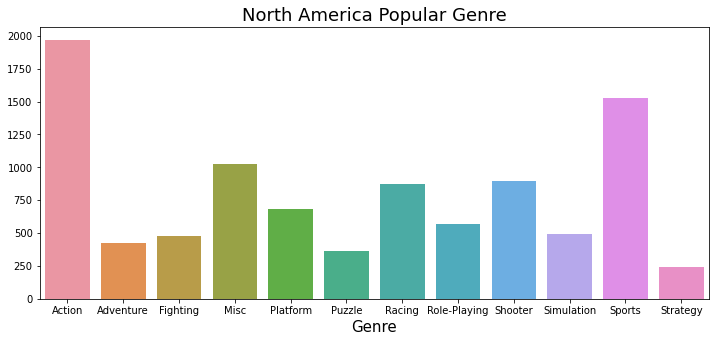

In [19]:
# 나라별 가장 인기 있는 장르
# barplot 으로 만들자
# 미국
df_us=df_bar[2:3]
df_us
# bar 그래프 그리기
plt.figure(figsize = (12,5))
sns.barplot(data=df_us)

plt.title('North America Popular Genre',fontsize = 18)


plt.xlabel('Genre',fontsize = 15)
plt.show()



미국은 Action, Sports, Misc 순으로 인기가 많다

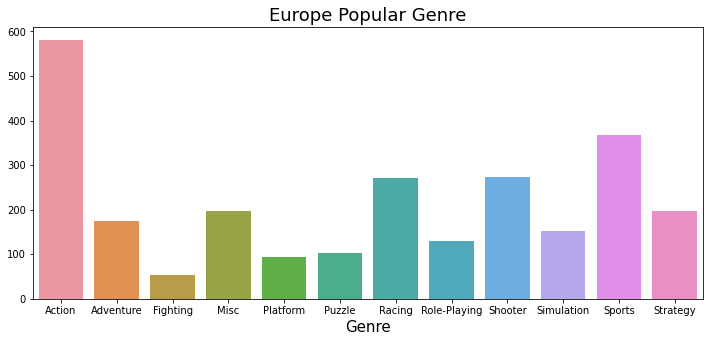

In [20]:
# 유럽
df_eu=df_bar[0:1]
df_eu
# bar 그래프 그리기
plt.figure(figsize = (12,5))
sns.barplot(data=df_eu)

plt.title('Europe Popular Genre',fontsize = 18)


plt.xlabel('Genre',fontsize = 15)
plt.show()

유럽은 Action, Sports, Shooter 순으로 인기가 많다

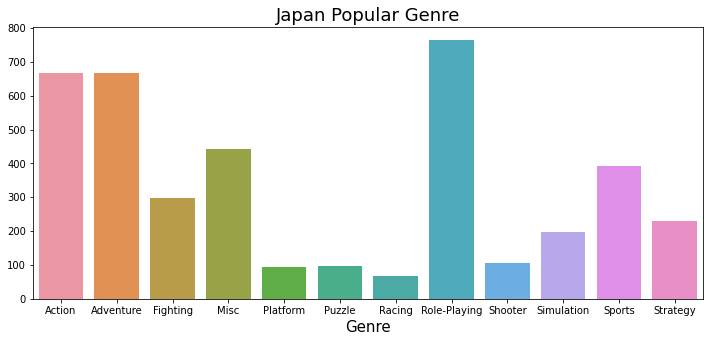

In [21]:
# 일본
df_jp=df_bar[1:2]
df_jp
# bar 그래프 그리기
plt.figure(figsize = (12,5))
sns.barplot(data=df_jp)

plt.title('Japan Popular Genre',fontsize = 18)


plt.xlabel('Genre',fontsize = 15)
plt.show()

일본은 Role-Playing, Action, Adventure 순으로 인기가 많다

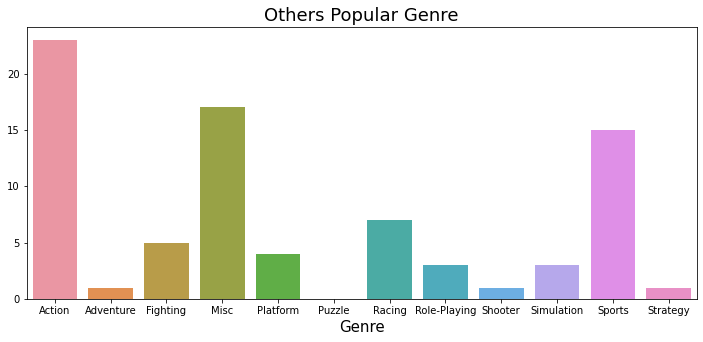

In [22]:
# 다른 나라
df_ot=df_bar[3:4]
df_ot
# bar 그래프 그리기
plt.figure(figsize = (12,5))
sns.barplot(data=df_ot)

plt.title('Others Popular Genre',fontsize = 18)


plt.xlabel('Genre',fontsize = 15)
plt.show()

### **연도별 게임의 트렌드가 있을까**
연도별 게임 트랜드가 있을까? 연도별로 게임 트랜드가 다를까?

1. 년도 그룹핑 무슨무슨 년도가 있는지 (이때, 0 인 년도는 보지 않기로 한다)
2. 각 장르별 판매량!
3. na + eu + jp sales 양 합치자
6. 그래프 그려보자

In [23]:
df
# 연도별 게임의 트렌드가 있을까


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,max_coun
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,NA
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,NA
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,JP
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,NA
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,NA
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,NA
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,NA
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,NA
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,JP


In [24]:
#데이터 프레임 칼럼 추가
df["sales_am"]=0

In [25]:
# 각 나라별 sales 양 합치는 함수
for i in range(len(df_coun['NA_Sales'])):
  df.iloc[i,10]= df_coun.iloc[i,0]+df_coun.iloc[i,1]+df_coun.iloc[i,2]+df_coun.iloc[i,3]

df["sales_am"]

1        0.04
2        0.18
3        0.02
4        0.04
5        0.25
         ... 
16594    0.20
16595    0.01
16596    0.79
16597    0.38
16598    0.17
Name: sales_am, Length: 16241, dtype: float64

In [26]:
#년도 그룹핑 무슨무슨 년도가 있는지 (이때, 0 인 년도는 보지 않기로 한다)
df.groupby('Year').size()

Year
0.0        100
1980.0       8
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      20
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     120
1995.0     215
1996.0     259
1997.0     287
1998.0     374
1999.0     336
2000.0     345
2001.0     478
2002.0     823
2003.0     767
2004.0     736
2005.0     930
2006.0     998
2007.0    1192
2008.0    1413
2009.0    1418
2010.0    1246
2011.0    1123
2012.0     650
2013.0     543
2014.0     578
2015.0     606
2016.0     337
2017.0       3
2020.0       1
dtype: int64

In [27]:
df_ys=df[['Year','Genre','sales_am']]
year_0=df_ys[df_ys['Year']==0].index # year가 0인거 버린다
df_ys=df_ys.drop(year_0)
df_ys

,Year,Genre,sales_am
1,2008.0,Action,0.04
2,2009.0,Action,0.18
3,2010.0,Adventure,0.02
4,2010.0,Misc,0.04
5,2010.0,Platform,0.25
...,...,...,...
16594,2006.0,Platform,0.20
16595,2005.0,Action,0.01
16596,2015.0,Sports,0.79
16597,2013.0,Action,0.38


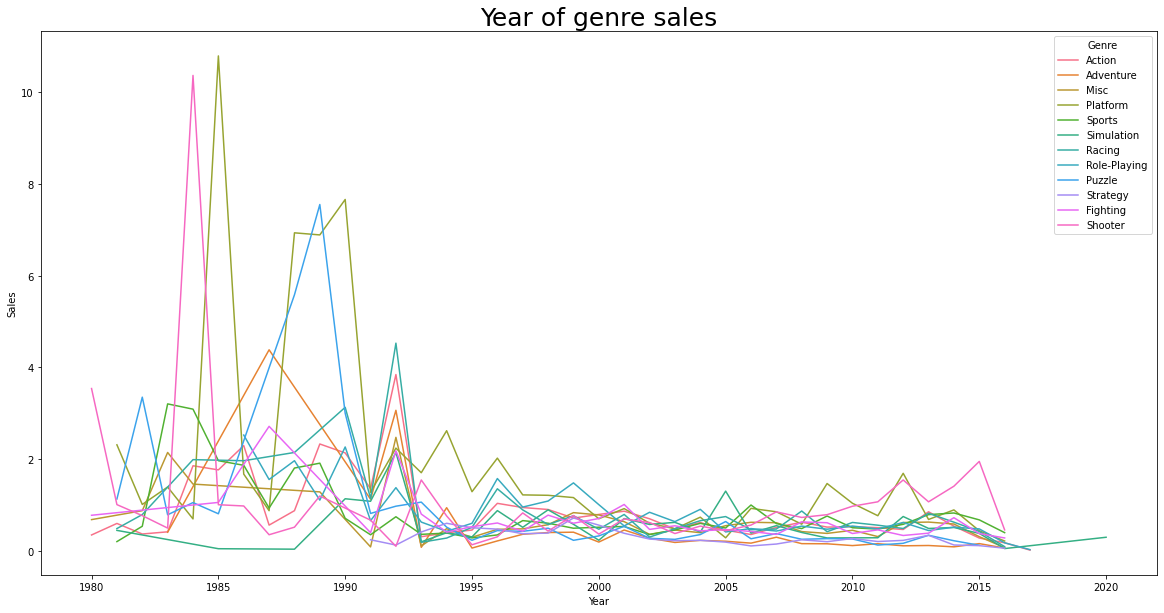

In [28]:
# 연도별 장르 판매량 그래프 그리자

# 색 팔레트 선택 범주형인것을 고려
qualitative_colors = sns.color_palette("Set1", 10)
sns.color_palette(qualitative_colors)
# 그래프 크기
plt.figure(figsize=(20, 10))
grp= sns.lineplot(x='Year',y='sales_am',hue='Genre',data=df_ys,ci=None)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Year of genre sales", fontsize = 25)

plt.show()

In [29]:
# 연도별 선호 플랫폼이 있을까?
# 연도별 선호 플랫폼 그리자
df_Ps=df[['Year','Platform','sales_am']]
year_0=df_Ps[df_Ps['Year']==0].index # 년도가 0인것 삭제 해주기
plat_0=df_Ps[df_Ps['Platform']==0].index# 플랫폼이 0 인것 삭제
df_Ps=df_Ps.drop(year_0)
df_Ps=df_Ps.drop(plat_0)
df_Ps

,Year,Platform,sales_am
1,2008.0,DS,0.04
2,2009.0,Wii,0.18
3,2010.0,PSP,0.02
4,2010.0,DS,0.04
5,2010.0,PS3,0.25
...,...,...,...
16594,2006.0,GC,0.20
16595,2005.0,PSP,0.01
16596,2015.0,PS3,0.79
16597,2013.0,PSV,0.38


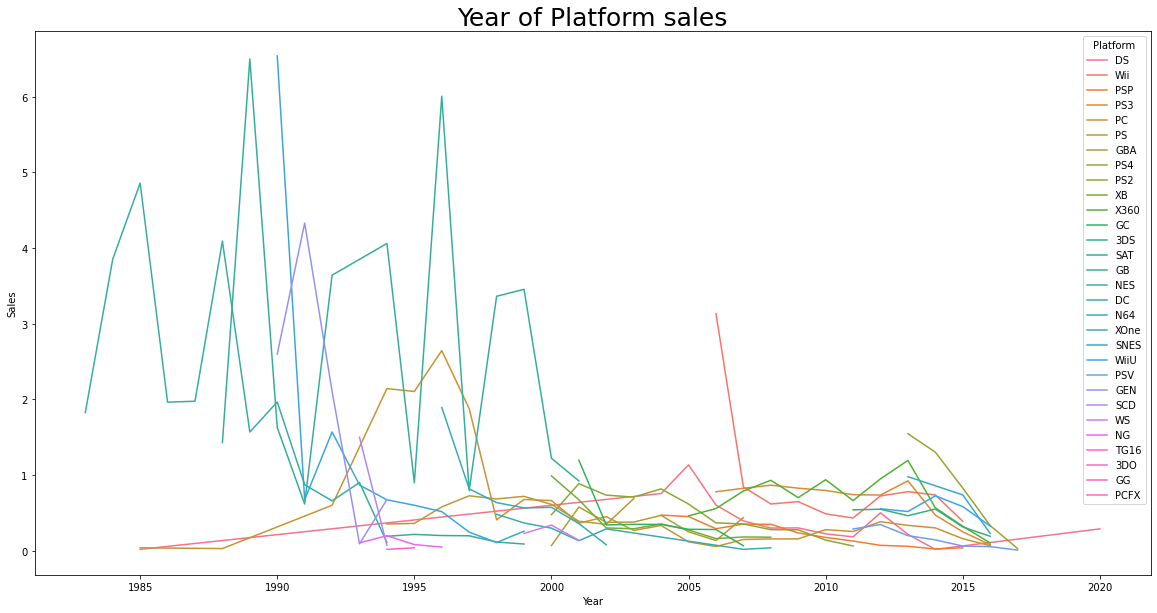

In [30]:
plt.figure(figsize=(20, 10))
grp1= sns.lineplot(x='Year',y='sales_am',hue='Platform',data=df_Ps,ci=None)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Year of Platform sales", fontsize = 25)

plt.show()

## **년도에 따른 플랫폼 별 선호도 존재함**

## 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
<최근 10년간>
왜냐하면 위에 그래프를 봤을때 5년 사이에 트랜드가 확확 바뀌기 때문에 
지난 년도를 분석 하는건 예측에 의미가 크지 않다\
**연도별 출고량이 가장 높은 장르**\
데이터 프레임 년도 장르 총 출고량 으로\
x= 년도 y= 출고량 hue= 장르 이렇게 그래프 만들자\
**지역별 출고량이 가장 높은 장르**\
데이터 프레임 지역 장르 총 출고량 으로\
x= 장르 y= 출고량 hue= 지역 이렇게 그래프 만들자\
**연도별 출고량이 가장 높은 플랫폼**\
데이터 프레임 년도 플랫폼 총 출고량 으로\
x= 년도 y= 출고량 hue= 플랫폼 이렇게 그래프 만들자\
**지역별 출고량이 가장 높은 플랫폼**\
데이터 프레임 년도 장르 총 출고량 으로\
x=플랫폼  y= 출고량 hue=지역 이렇게 그래프 만들자

**전체 게임 출고량 중에 가장 높은 게임 찾기**


In [31]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,max_coun,sales_am
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,NA,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,NA,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,JP,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,NA,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,NA,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,NA,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,NA,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,NA,0.79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,JP,0.38


최근 10년간 출고량이 가장 높은 장르와 플랫폼을 찾자\
그룹바이를 써서 2015-2020 사이에 가장 판매량이 높은\
장르\
그룹바이를 써서 2015-2020 사이에 가장 판매량이 높은\
플랫폼


In [32]:
# 전체 장르 출고양 순위
df_g=df[['Genre','sales_am']]
df_g=df_g.groupby('Genre').sum()
df_g=df_g.sort_values('sales_am')
df_g.sort_values('sales_am',ascending=False,inplace=True)
df_g=df_g.T
df_g

Genre,Action,Sports,Shooter,Role-Playing,Platform,Misc,Racing,Fighting,Simulation,Puzzle,Adventure,Strategy
sales_am,1712.98,1305.34,1024.75,901.51,827.99,779.7,722.55,443.54,389.28,240.73,234.02,172.98


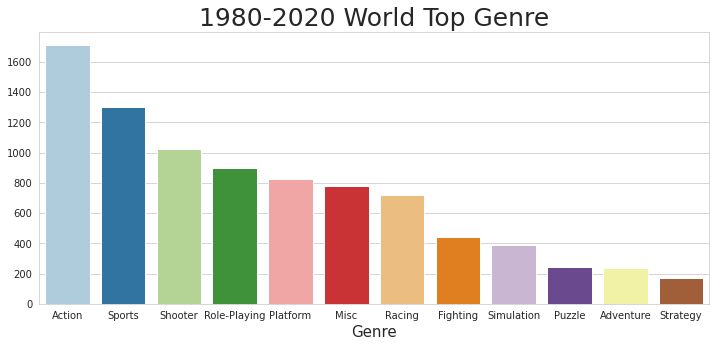

In [33]:
sns.set_palette("Paired")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_g,ci=None)

plt.title('1980-2020 World Top Genre',fontsize = 25)


plt.xlabel('Genre',fontsize = 15)
plt.show()

In [34]:
# 1980-2020 플렛폼 출고량 내림차순 정렬
df_p=df[['Platform','sales_am']]
df_p=df_p.groupby('Platform').sum()
df_p=df_p.sort_values('sales_am')
df_p.sort_values('sales_am',ascending=False,inplace=True)
df_p=df_p.T
df_p


Platform,PS2,X360,PS3,Wii,DS,PS,GBA,PSP,PS4,GB,...,SAT,GEN,DC,SCD,NG,WS,TG16,3DO,GG,PCFX
sales_am,1222.44,968.59,946.74,900.15,817.19,725.16,304.76,290.84,275.78,254.43,...,33.59,28.35,15.95,1.86,1.44,1.42,0.16,0.1,0.04,0.03


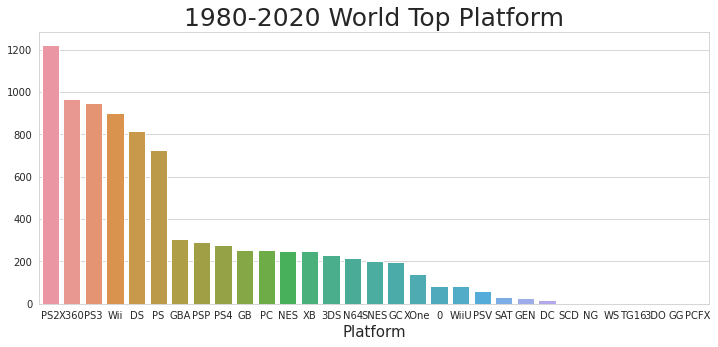

In [35]:
sns.set_palette("rocket")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_p,ci=None)

plt.title('1980-2020 World Top Platform',fontsize = 25)


plt.xlabel('Platform',fontsize = 15)
plt.show()

In [36]:
df_N=df[['Name','Other_Sales']]
df_N= df_N.groupby('Name').sum() # 중복항 더해주기
df_N.sort_values('Other_Sales',ascending=False,inplace=True)
df_N=df_N[0:10]
df_N=df_N.T
df_N

Name,Grand Theft Auto: San Andreas,Wii Sports,Grand Theft Auto V,Gran Turismo 4,Call of Duty: Black Ops II,FIFA Soccer 08,Pro Evolution Soccer 2008,Call of Duty: Black Ops 3,Call of Duty: Modern Warfare 3,Mario Kart Wii
Other_Sales,10.72,8.46,8.03,7.53,3.88,3.53,3.51,3.42,3.35,3.31


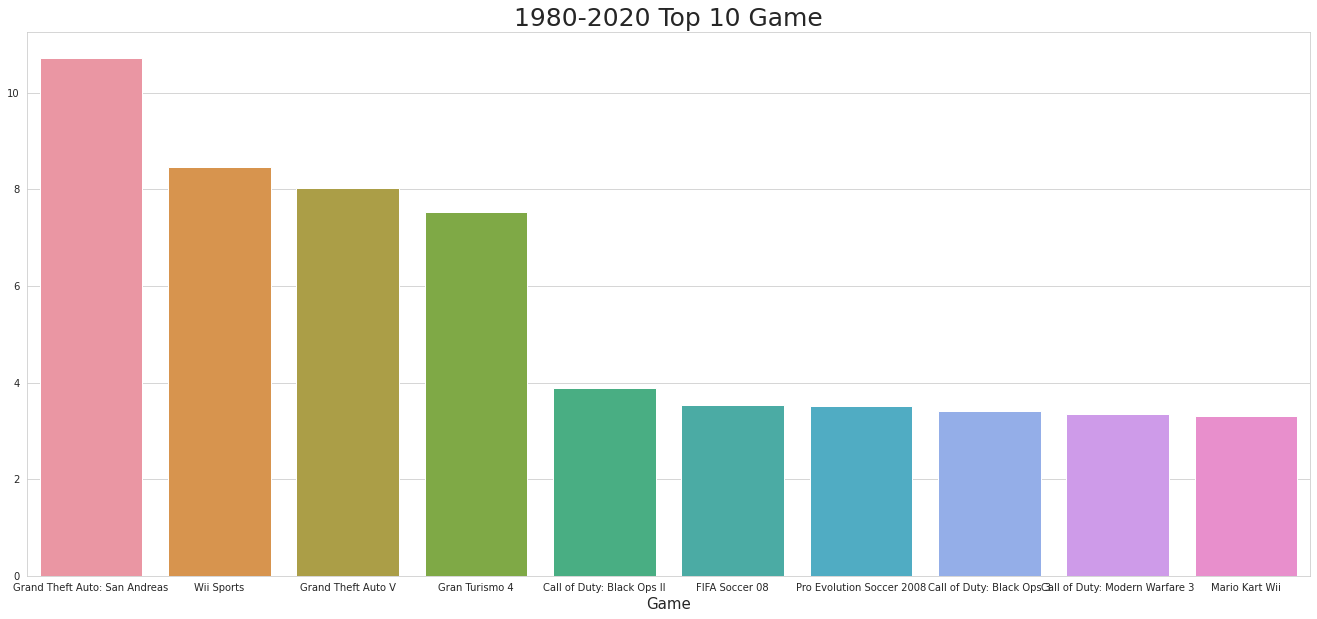

In [37]:

sns.set_palette("hls")
sns.set_style('whitegrid')

plt.figure(figsize = (23,10))
sns.barplot(data=df_N,ci=None)

plt.title('1980-2020 Top 10 Game',fontsize = 25)


plt.xlabel('Game',fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


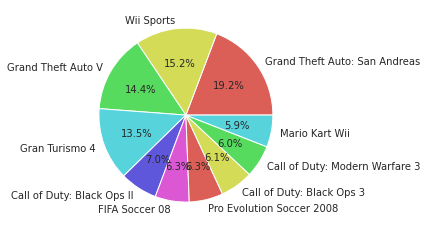

In [86]:

df_N=df_N.T

plt.pie(df_N, labels = df_N.index, autopct = '%.1f%%')
plt.show()

In [38]:
#2015<= year <= 2020 뽑기

condition = (df.Year >= 2010) & (df.Year <= 2020) # 조건식 작성

df_1520=df[condition]
df_1520


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,max_coun,sales_am
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,JP,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,NA,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,NA,0.25
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,NA,0.03
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,NA,0.08
...,...,...,...,...,...,...,...,...,...,...,...
16582,LEGO The Hobbit,XOne,2014.0,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,NA,0.27
16589,MindJack,PS3,2011.0,Shooter,Square Enix,0.07,0.08,0.00,0.03,EU,0.18
16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,JP,0.05
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,NA,0.79


In [39]:
# 10-20 장르 출고량 내림차순 정렬
df_1520_g=df_1520[['Genre','sales_am']]
df_1520_g=df_1520_g.groupby('Genre').sum()
df_1520_g=df_1520_g.sort_values('sales_am')
df_1520_g.sort_values('sales_am',ascending=False,inplace=True)
df_1520_g=df_1520_g.T
df_1520_g
# 10-20 장르 출고량 내림 차순 정렬

Genre,Action,Shooter,Sports,Role-Playing,Misc,Racing,Platform,Fighting,Simulation,Adventure,Strategy,Puzzle
sales_am,669.49,456.4,321.73,264.22,228.6,123.49,120.73,81.13,70.84,60.79,35.51,20.95


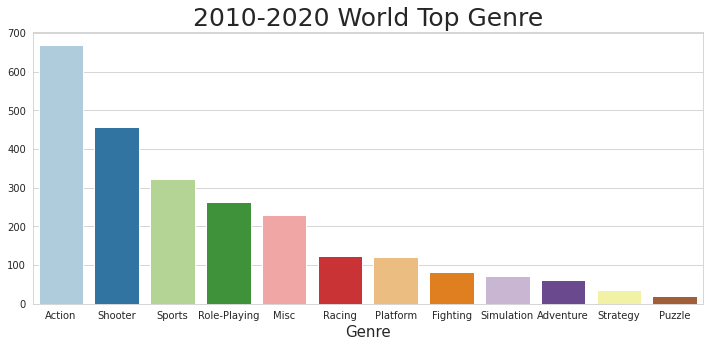

In [40]:
# 최근 10년간 장르 판매량을 보여주는 그래프
sns.set_palette("Paired")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_1520_g,ci=None)

plt.title('2010-2020 World Top Genre',fontsize = 25)


plt.xlabel('Genre',fontsize = 15)
plt.show()

In [41]:
# 10-20 플렛폼 출고량 내림차순 정렬
df_1520_p=df_1520[['Platform','sales_am']]
df_1520_p=df_1520_p.groupby('Platform').sum()
df_1520_p=df_1520_p.sort_values('sales_am')
df_1520_p.sort_values('sales_am',ascending=False,inplace=True)
df_1520_p=df_1520_p.T
df_1520_p


Platform,PS3,X360,PS4,3DS,Wii,XOne,PC,DS,WiiU,PSP,PSV,PS2
sales_am,600.1,545.8,269.15,231.22,223.08,141.08,119.35,113.86,81.79,62.03,60.85,5.57


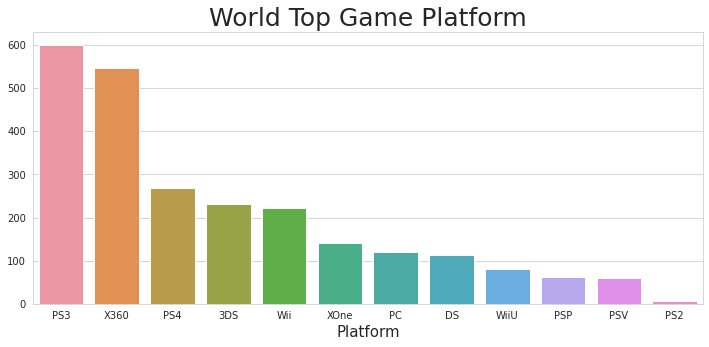

In [42]:
# 최근 10년간 플랫폼 판매량을 보여주는 그래프
sns.set_palette("rocket")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_1520_p,ci=None)

plt.title('World Top Game Platform',fontsize = 25)


plt.xlabel('Platform',fontsize = 15)
plt.show()

In [43]:
# 10년간 전체 게임 판매량
holl= df_1520[['Name','sales_am']]
holl= holl.groupby('Name').sum() # 중복항 더해주기
holl.sort_values('sales_am',ascending=False,inplace=True)

holl
holl_top10=holl[0:10]
holl_top10=holl_top10.T
holl_top10


Name,Grand Theft Auto V,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops II,Call of Duty: Black Ops,Call of Duty: Ghosts,Call of Duty: Black Ops 3,Minecraft,Call of Duty: Advanced Warfare,Kinect Adventures!,FIFA 15
sales_am,55.92,30.84,29.73,29.41,27.37,25.3,23.75,21.89,21.82,19.02


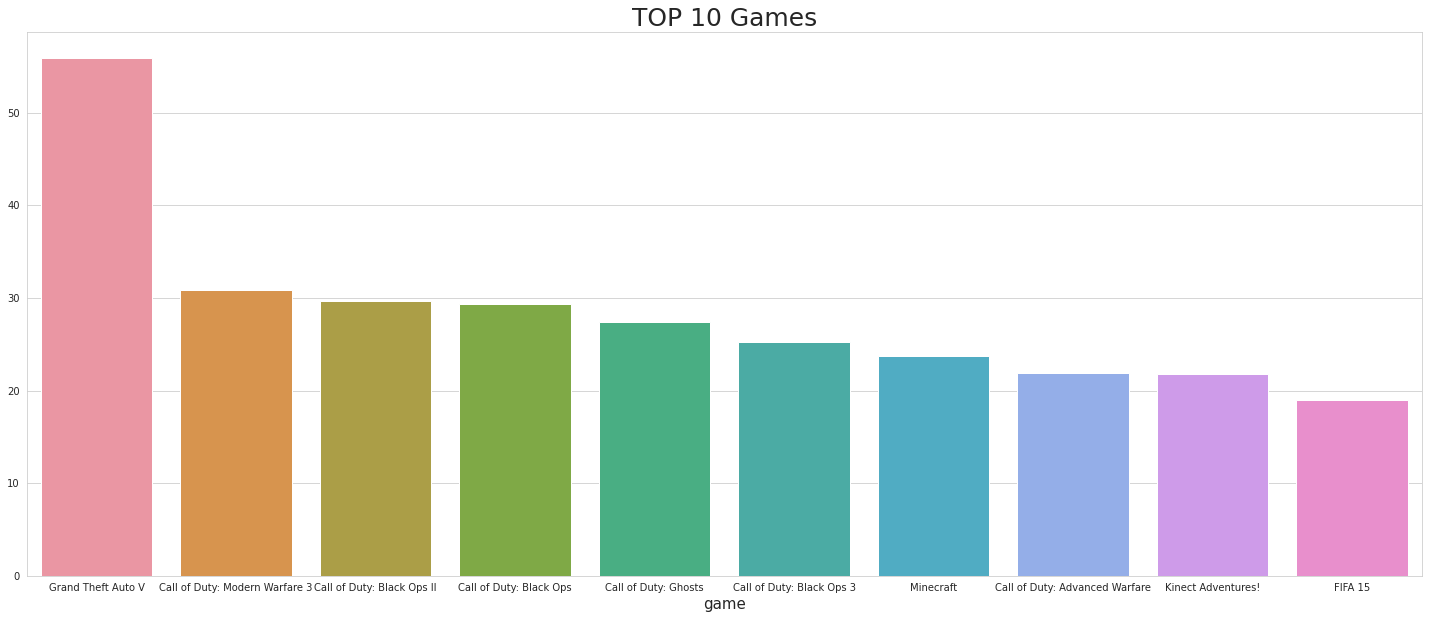

In [44]:
sns.set_palette("rocket")
sns.set_style('whitegrid')

plt.figure(figsize = (25,10))
sns.barplot(data=holl_top10,ci=None)

plt.title('TOP 10 Games',fontsize = 25)
plt.xlabel('game',fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


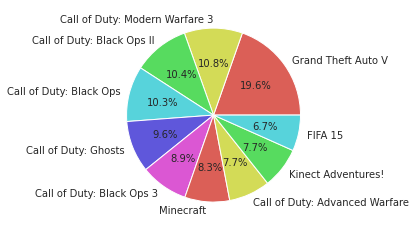

In [87]:
holl_top10=holl_top10.T

plt.pie(holl_top10, labels = holl_top10.index, autopct = '%.1f%%')
plt.show()

In [45]:
#지역별 출고량이 가장 높은 장르(최근 10년간)
#북미
df_NS_G=df_1520[['Genre','NA_Sales']]
df_NS_G= df_NS_G.groupby('Genre').sum() # 중복항 더해주기
df_NS_G.sort_values('NA_Sales',ascending=False,inplace=True)
df_NS_G=df_NS_G.T
df_NS_G



Genre,Action,Shooter,Sports,Misc,Role-Playing,Platform,Racing,Fighting,Simulation,Adventure,Strategy,Puzzle
NA_Sales,286.4,225.17,152.57,123.15,90.72,55.47,45.53,38.56,26.59,20.64,13.25,9.23


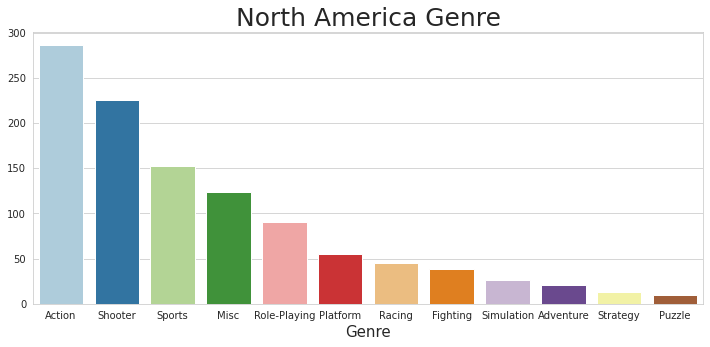

In [46]:
sns.set_palette("Paired")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_NS_G,ci=None)

plt.title('North America Genre',fontsize = 25)


plt.xlabel('Genre',fontsize = 15)
plt.show()

10년 사이 '북미에서'가장 인기 있는 장르는
Action,Misc,Sports,Role-Playing

In [47]:
#지역별 출고량이 가장 높은 장르(최근 10년간)
#dbfjq
df_ES_G=df_1520[['Genre','EU_Sales']]
df_ES_G= df_ES_G.groupby('Genre').sum() # 중복항 더해주기
df_ES_G.sort_values('EU_Sales',ascending=False,inplace=True)
df_ES_G=df_ES_G.T
df_ES_G




Genre,Action,Shooter,Sports,Misc,Role-Playing,Racing,Platform,Simulation,Fighting,Adventure,Strategy,Puzzle
EU_Sales,234.96,163.74,115.09,64.23,62.92,55.47,38.67,25.14,20.77,19.07,12.3,6.72


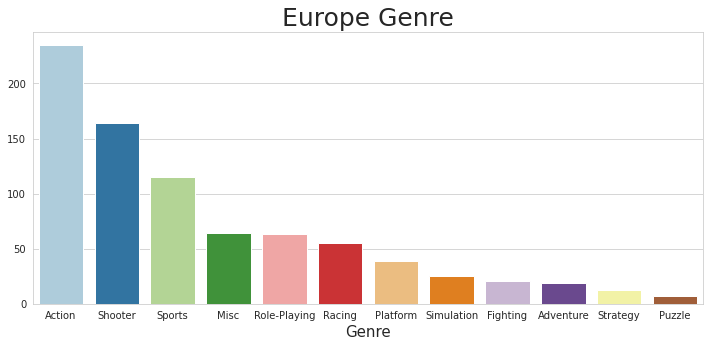

In [48]:
sns.set_palette("Paired")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_ES_G,ci=None)

plt.title('Europe Genre',fontsize = 25)


plt.xlabel('Genre',fontsize = 15)
plt.show()

In [49]:
#지역별 출고량이 가장 높은 장르(최근 10년간)
#일본
df_JS_G=df_1520[['Genre','JP_Sales']]
df_JS_G= df_JS_G.groupby('Genre').sum() # 중복항 더해주기
df_JS_G.sort_values('JP_Sales',ascending=False,inplace=True)
df_JS_G=df_JS_G.T
df_JS_G



Genre,Role-Playing,Action,Misc,Platform,Adventure,Sports,Fighting,Shooter,Simulation,Racing,Strategy,Puzzle
JP_Sales,89.51,70.3,21.05,15.75,15.24,15.16,13.35,13.32,13.12,6.65,6.46,3.4


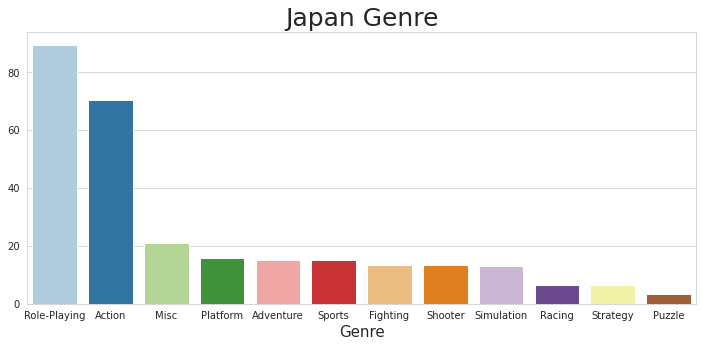

In [50]:
sns.set_palette("Paired")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_JS_G,ci=None)

plt.title('Japan Genre',fontsize = 25)


plt.xlabel('Genre',fontsize = 15)
plt.show()

In [51]:
#지역별 출고량이 가장 높은 장르(최근 10년간)
#일본
df_OT_G=df_1520[['Genre','Other_Sales']]
df_OT_G= df_OT_G.groupby('Genre').sum() # 중복항 더해주기
df_OT_G.sort_values('Other_Sales',ascending=False,inplace=True)
df_OT_G=df_OT_G.T
df_OT_G

Genre,Action,Shooter,Sports,Role-Playing,Misc,Racing,Platform,Fighting,Simulation,Adventure,Strategy,Puzzle
Other_Sales,77.83,54.17,38.91,21.07,20.17,15.84,10.84,8.45,5.99,5.84,3.5,1.6


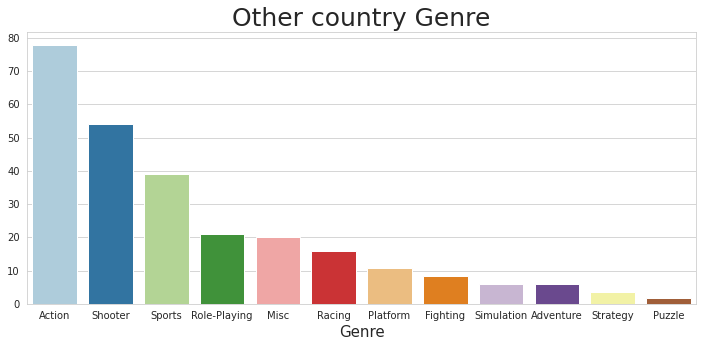

In [52]:
sns.set_palette("Paired")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_OT_G,ci=None)

plt.title('Other country Genre',fontsize = 25)


plt.xlabel('Genre',fontsize = 15)
plt.show()

In [53]:
#지역별 출고량이 가장 높은 플랫폼(최근 10년간)
#북미
df_NS_P=df_1520[['Platform','NA_Sales']]
df_NS_P= df_NS_P.groupby('Platform').sum() # 중복항 더해주기
df_NS_P.sort_values('NA_Sales',ascending=False,inplace=True)
df_NS_P=df_NS_P.T

df_NS_P



Platform,X360,PS3,Wii,PS4,XOne,3DS,DS,WiiU,PC,PSV,PSP,PS2
NA_Sales,326.61,227.32,124.34,93.04,83.19,72.76,57.11,38.32,37.96,15.86,8.86,1.91


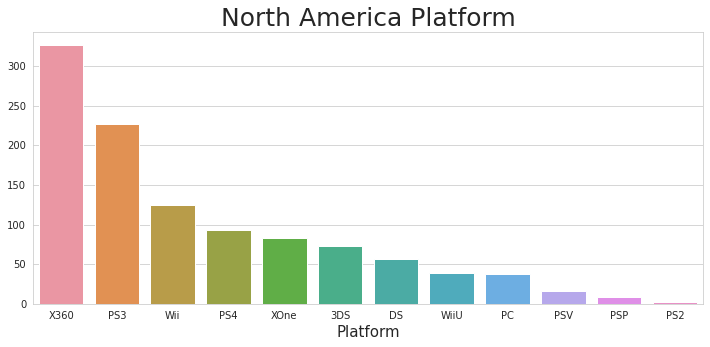

In [54]:
sns.set_palette("tab10")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_NS_P,ci=None)

plt.title('North America Platform',fontsize = 25)


plt.xlabel('Platform',fontsize = 15)
plt.show()

In [55]:
#지역별 출고량이 가장 높은 플랫폼(최근 10년간)
#유럽
df_ES_P=df_1520[['Platform','EU_Sales']]
df_ES_P= df_ES_P.groupby('Platform').sum() # 중복항 더해주기
df_ES_P.sort_values('EU_Sales',ascending=False,inplace=True)
df_ES_P=df_ES_P.T

df_ES_P



Platform,PS3,X360,PS4,PC,Wii,3DS,XOne,DS,WiiU,PSV,PSP,PS2
EU_Sales,223.61,167.82,120.29,65.75,65.37,54.18,45.63,27.01,24.23,16.1,7.44,1.65


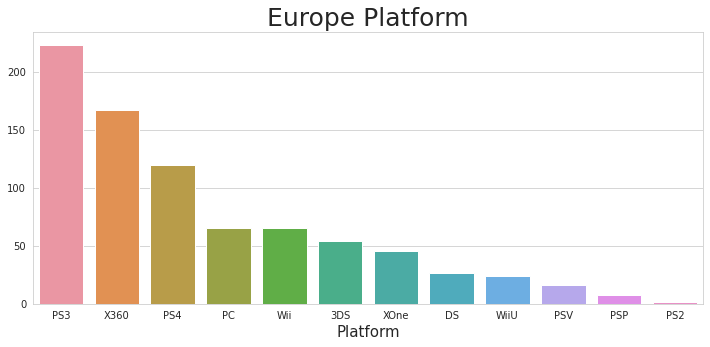

In [56]:
sns.set_palette("rocket")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_ES_P,ci=None)

plt.title('Europe Platform',fontsize = 25)


plt.xlabel('Platform',fontsize = 15)
plt.show()

In [57]:
#지역별 출고량이 가장 높은 플랫폼(최근 10년간)
#일본
df_JS_P=df_1520[['Platform','JP_Sales']]

#df_JS_P=pd.crosstab(df_JS['JP_Sales'],df_JS['Platform'])
df_JS_P= df_JS_P.groupby('Platform').sum() # 중복항 더해주기
df_JS_P.sort_values('JP_Sales',ascending=False,inplace=True)
df_JS_P=df_JS_P.T
df_JS_P



Platform,3DS,PS3,PSP,DS,PSV,Wii,PS4,WiiU,X360,PS2,XOne,PC
JP_Sales,92.53,58.59,41.28,22.01,20.55,15.26,13.85,12.79,5.33,0.78,0.34,0.0


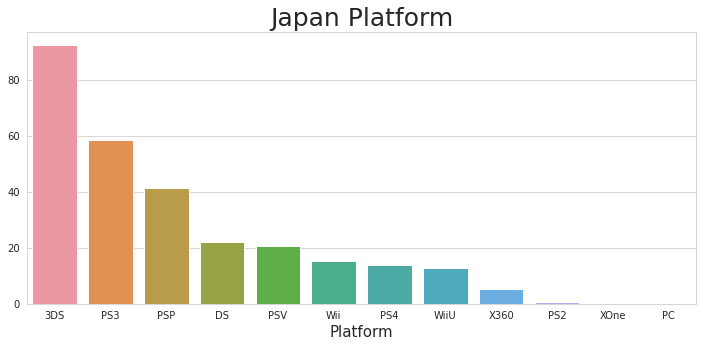

In [58]:
sns.set_palette("rocket")
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sns.barplot(data=df_JS_P,ci=None)

plt.title('Japan Platform',fontsize = 25)


plt.xlabel('Platform',fontsize = 15)
plt.show()

In [59]:
#지역별 출고량이 가장 높은 플랫폼(최근 10년간)
#다른 지역
df_OS_P=df_1520[['Platform','Other_Sales']]


df_OS_P= df_OS_P.groupby('Platform').sum() # 중복항 더해주기
df_OS_P.sort_values('Other_Sales',ascending=False,inplace=True)
df_OS_P=df_OS_P.T
#그래프 그리기


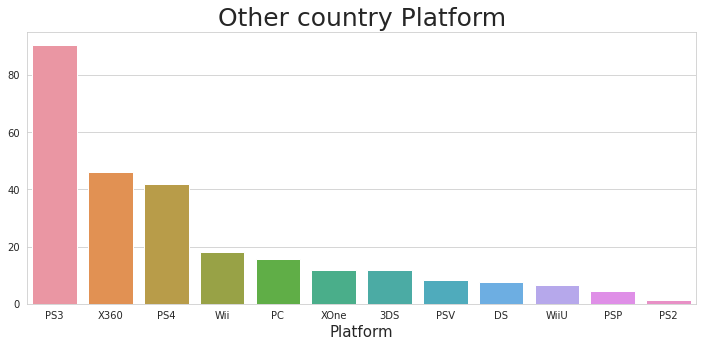

In [60]:
sns.set_palette("rocket")
sns.set_style('whitegrid')
plt.figure(figsize = (12,5))
sns.barplot(data=df_OS_P,ci=None)

plt.title('Other country Platform',fontsize = 25)


plt.xlabel('Platform',fontsize = 15)
plt.show()

In [61]:
#지역별 출고량이 가장 높은 게임(최근 10년간)

In [62]:
# 북미
df_NS_N=df_1520[['Name','NA_Sales']]
df_NS_N= df_NS_N.groupby('Name').sum() # 중복항 더해주기
df_NS_N.sort_values('NA_Sales',ascending=False,inplace=True)
df_NS_N=df_NS_N[0:10]
df_NS_N=df_NS_N.T
df_NS_N

Name,Grand Theft Auto V,Call of Duty: Black Ops,Call of Duty: Modern Warfare 3,Kinect Adventures!,Call of Duty: Ghosts,Call of Duty: Black Ops II,Call of Duty: Black Ops 3,Minecraft,Call of Duty: Advanced Warfare,Battlefield 3
NA_Sales,23.46,17.01,15.58,14.97,14.92,14.08,11.89,10.82,10.44,8.2


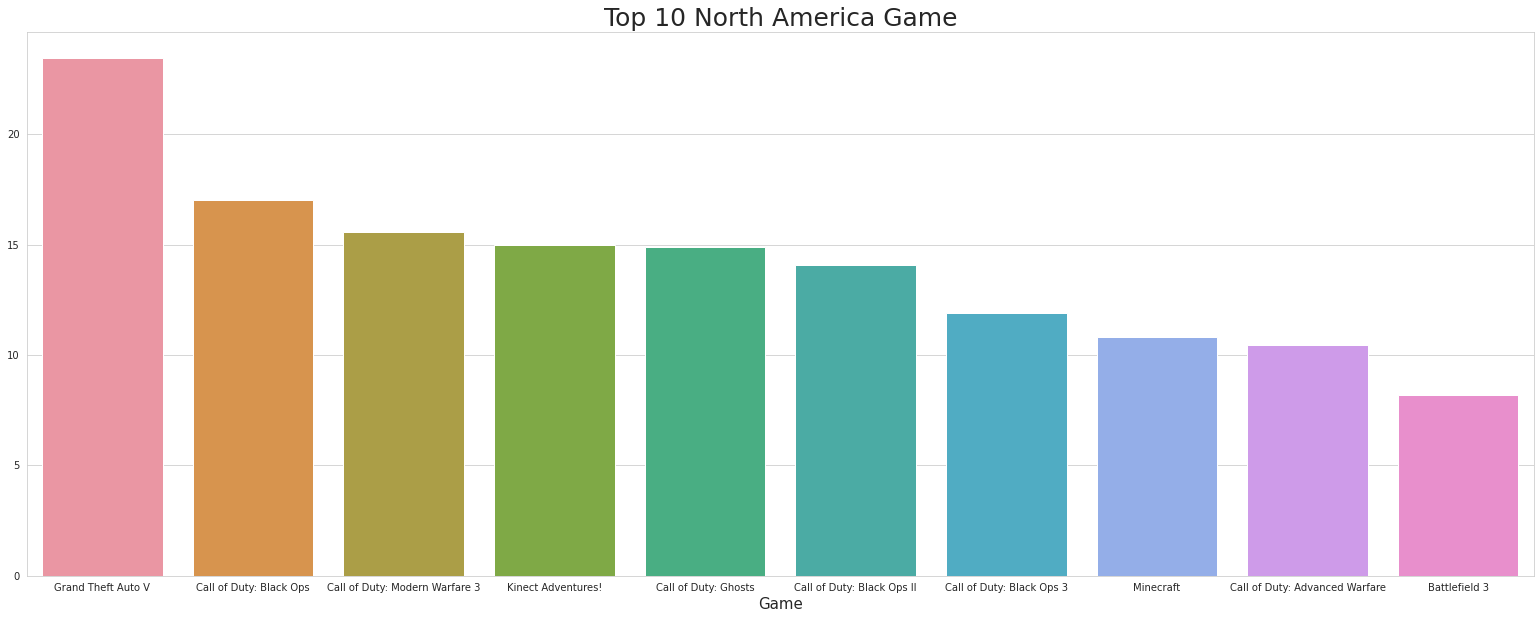

In [63]:
sns.set_palette("hls")
sns.set_style('whitegrid')
plt.figure(figsize = (27,10))
sns.barplot(data=df_NS_N,ci=None)

plt.title('Top 10 North America Game',fontsize = 25)


plt.xlabel('Game',fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


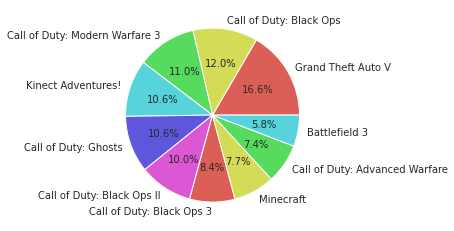

In [85]:
df_NS_N=df_NS_N.T
plt.pie(df_NS_N, labels = df_NS_N.index, autopct = '%.1f%%')
plt.show()

In [64]:
# 유럽
df_EU_N=df_1520[['Name','EU_Sales']]
df_EU_N= df_EU_N.groupby('Name').sum() # 중복항 더해주기
df_EU_N.sort_values('EU_Sales',ascending=False,inplace=True)
df_EU_N=df_EU_N[0:10]
df_EU_N=df_EU_N.T
df_EU_N

Name,Grand Theft Auto V,FIFA 15,Call of Duty: Modern Warfare 3,FIFA 16,FIFA 14,Call of Duty: Black Ops II,FIFA Soccer 13,Call of Duty: Black Ops 3,Call of Duty: Ghosts,Minecraft
EU_Sales,23.04,12.4,11.29,11.29,11.14,11.05,10.25,9.56,9.05,8.85


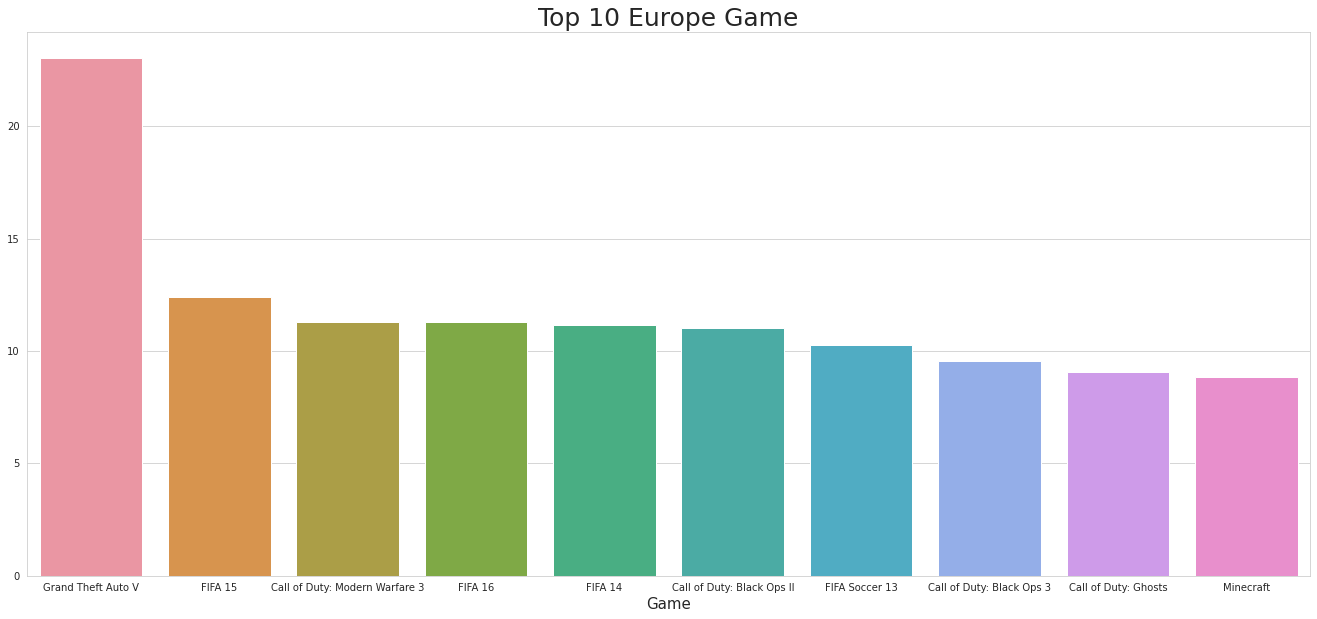

In [65]:
sns.set_palette("hls")
sns.set_style('whitegrid')
plt.figure(figsize = (23,10))
sns.barplot(data=df_EU_N,ci=None)

plt.title('Top 10 Europe Game',fontsize = 25)


plt.xlabel('Game',fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


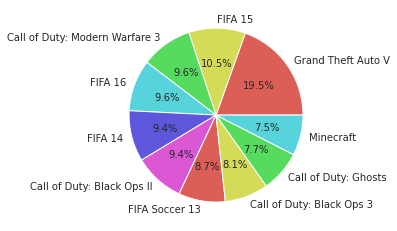

In [84]:
df_EU_N=df_EU_N.T

plt.pie(df_EU_N, labels = df_EU_N.index, autopct = '%.1f%%')
plt.show()

In [66]:
# 일본
df_JP_N=df_1520[['Name','JP_Sales']]
df_JP_N= df_JP_N.groupby('Name').sum() # 중복항 더해주기
df_JP_N.sort_values('JP_Sales',ascending=False,inplace=True)
df_JP_N=df_JP_N[0:10]
df_JP_N=df_JP_N.T
df_JP_N

Name,Monster Hunter Freedom 3,Animal Crossing: New Leaf,Monster Hunter 4,Super Smash Bros. for Wii U and 3DS,Yokai Watch 2 Ganso/Honke,Pokemon Black 2/Pokemon White 2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,Monster Hunter X,Yokai Watch 2 Shinuchi,Mario Kart 7
JP_Sales,4.87,4.36,3.44,3.22,3.18,3.14,3.08,2.78,2.68,2.67


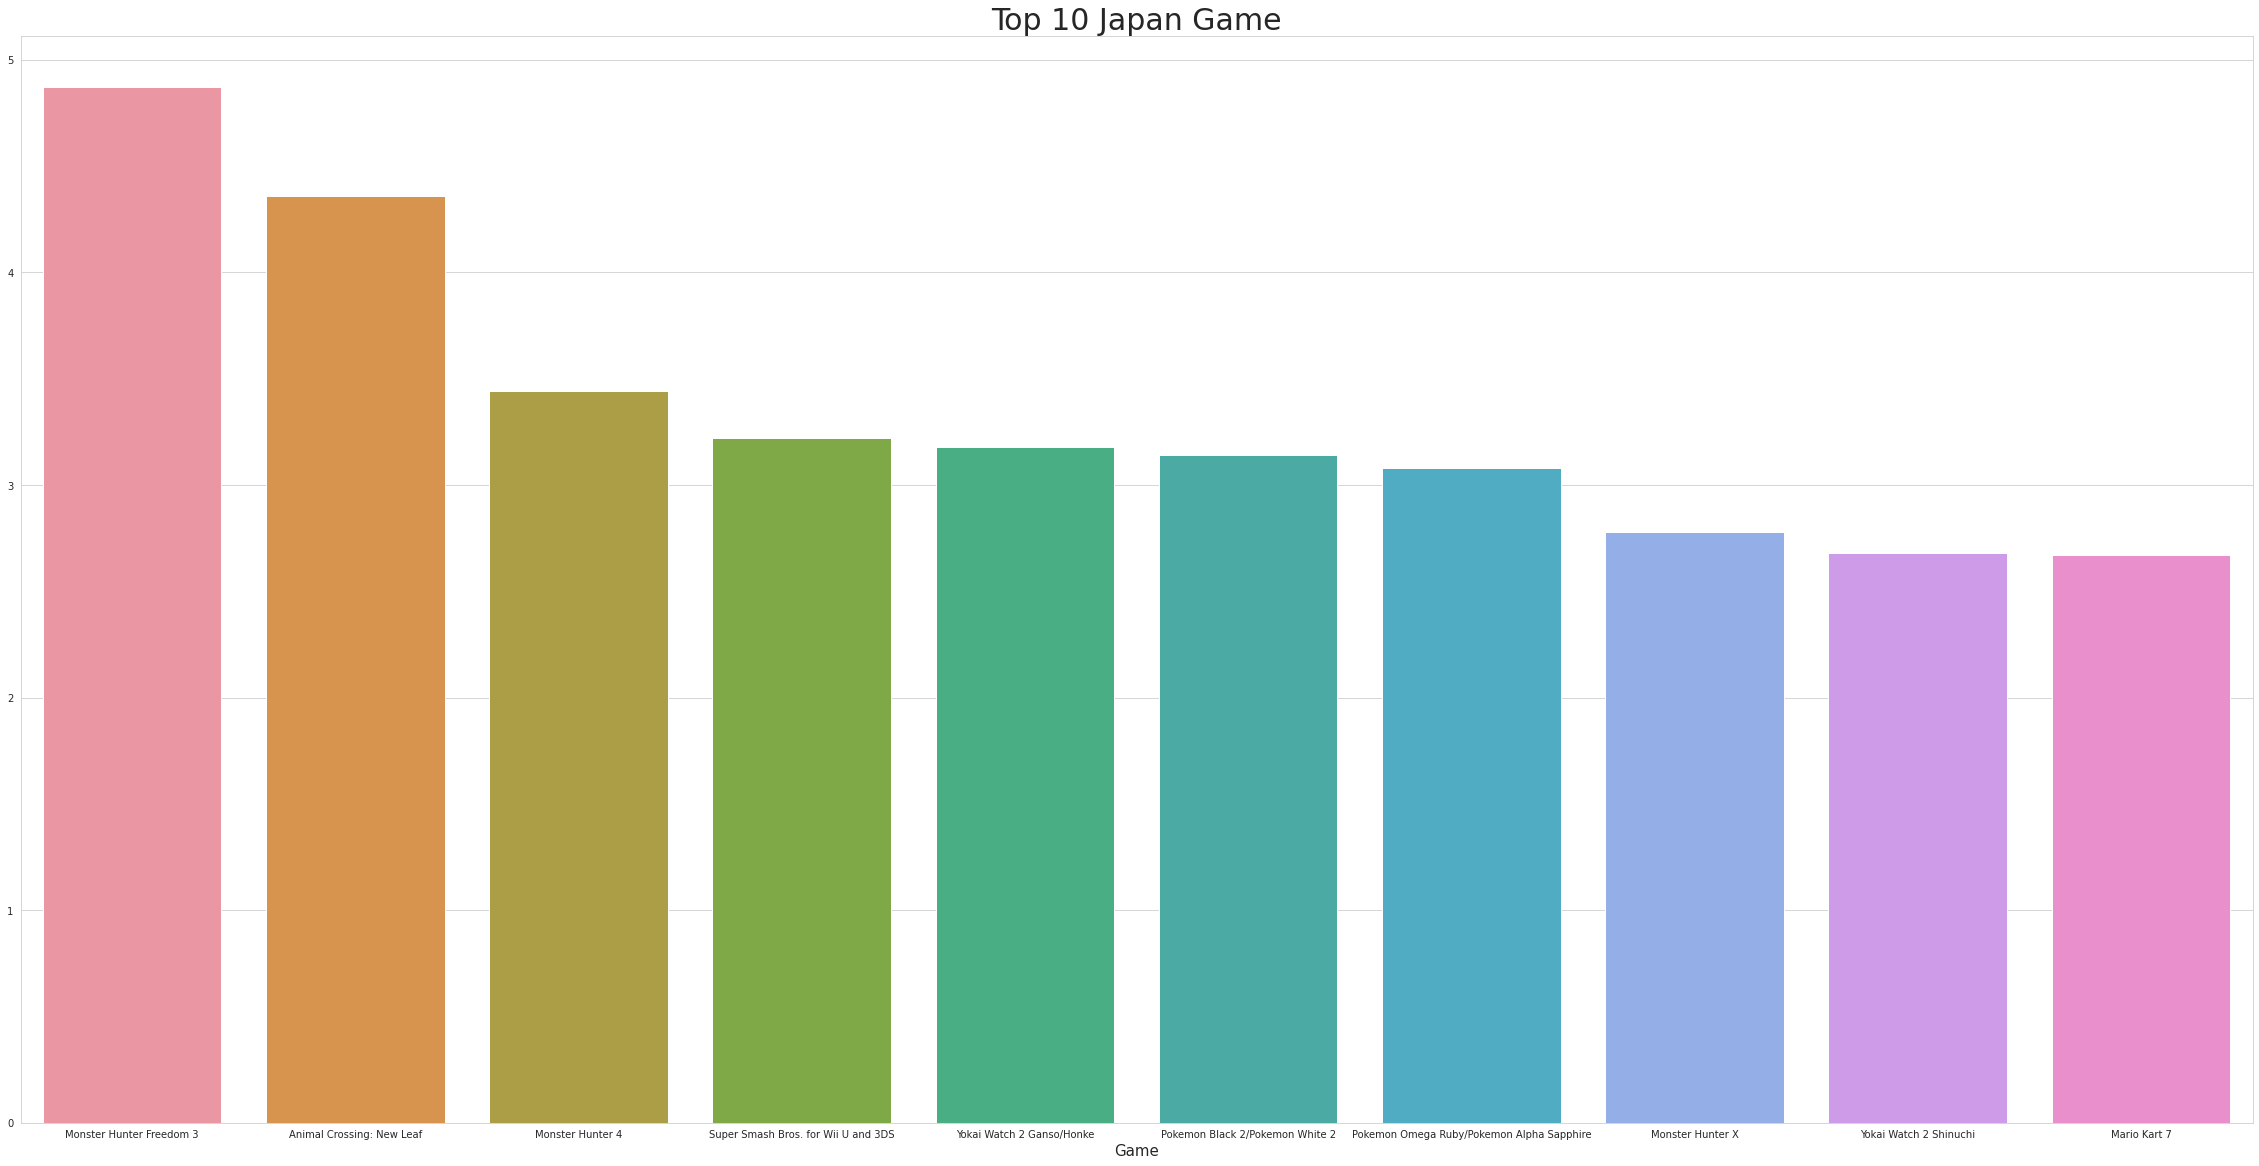

In [77]:
sns.set_palette("hls")
sns.set_style('whitegrid')
plt.figure(figsize = (40,20))
sns.barplot(data=df_JP_N,ci=None)

plt.title('Top 10 Japan Game',fontsize = 30)


plt.xlabel('Game',fontsize = 15)
plt.show()

In [82]:
df_JP_N=df_JP_N.T
df_JP_N

,JP_Sales
Name,
Monster Hunter Freedom 3,4.87
Animal Crossing: New Leaf,4.36
Monster Hunter 4,3.44
Super Smash Bros. for Wii U and 3DS,3.22
Yokai Watch 2 Ganso/Honke,3.18
Pokemon Black 2/Pokemon White 2,3.14
Pokemon Omega Ruby/Pokemon Alpha Sapphire,3.08
Monster Hunter X,2.78
Yokai Watch 2 Shinuchi,2.68


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


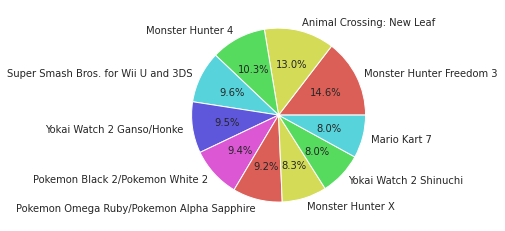

In [83]:
import matplotlib.pyplot as plt

plt.pie(df_JP_N, labels = df_JP_N.index, autopct = '%.1f%%')
plt.show()

In [68]:
# 다른나라
df_OT_N=df_1520[['Name','Other_Sales']]
df_OT_N= df_OT_N.groupby('Name').sum() # 중복항 더해주기
df_OT_N.sort_values('Other_Sales',ascending=False,inplace=True)
df_OT_N=df_OT_N[0:10]
df_OT_N=df_OT_N.T
df_OT_N

Name,Grand Theft Auto V,Call of Duty: Black Ops II,Call of Duty: Black Ops 3,Call of Duty: Modern Warfare 3,FIFA 15,Call of Duty: Black Ops,FIFA Soccer 13,FIFA 14,Call of Duty: Advanced Warfare,Minecraft
Other_Sales,8.03,3.88,3.42,3.35,3.29,3.12,3.03,2.98,2.93,2.93


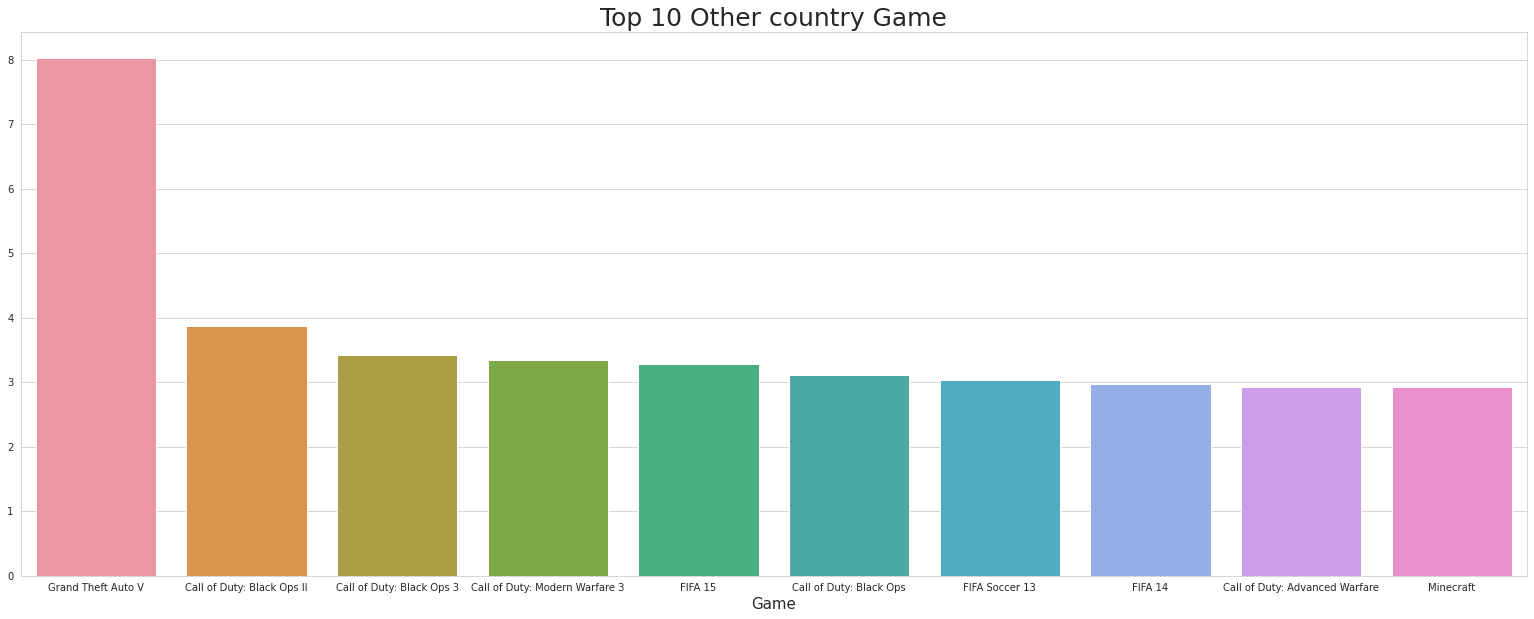

In [71]:
sns.set_palette("hls")
sns.set_style('whitegrid')
plt.figure(figsize = (27,10))
sns.barplot(data=df_OT_N,ci=None)

plt.title('Top 10 Other country Game',fontsize = 25)


plt.xlabel('Game',fontsize = 15)
plt.show()

In [78]:
df_OT_N=df_OT_N.T
df_OT_N

,Other_Sales
Name,
Grand Theft Auto V,8.03
Call of Duty: Black Ops II,3.88
Call of Duty: Black Ops 3,3.42
Call of Duty: Modern Warfare 3,3.35
FIFA 15,3.29
Call of Duty: Black Ops,3.12
FIFA Soccer 13,3.03
FIFA 14,2.98
Call of Duty: Advanced Warfare,2.93


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


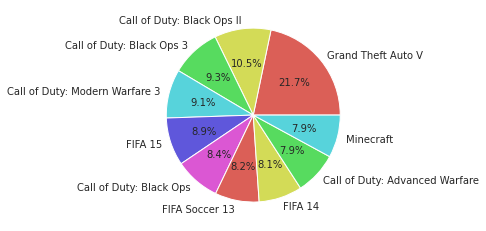

In [81]:
import matplotlib.pyplot as plt

plt.pie(df_OT_N, labels = df_OT_N.index, autopct = '%.1f%%')
plt.show()